In [85]:
import matplotlib.pyplot as plt

import skimage.io as io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import threshold_mean, sobel
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
import math
from typing import *


def print_img(title, image):
    plt.title(title)
    if len(image.shape) >= 3 and min(image.shape) > 1:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap=plt.cm.gray)
    plt.show()


def calc_euclidean(image1, image2):
    max_row_img2 = image2.shape[0]
    max_col_img2 = image2.shape[1]

    euclid = 0.0

    for row in range(0, image1.shape[0]):
        for col in range(0, image1.shape[1]):
            if (row < max_row_img2 and col < max_col_img2):
                p = (image1[row][col] - image2[row][col]) ** 2
                euclid = euclid + p/100

    return 10 * math.sqrt(euclid)


base_dir = "../../data"

image_db = pd.read_csv(f'{base_dir}/ODIR-5K/data.csv')


In [86]:
from scipy.stats import ks_2samp


def show_histogram(image):
    fig, ax = plt.subplots(2, 3)
    bins = 256
    for ci, c in enumerate('rgb'):
        ax[0, ci].imshow(image[:, :, ci], cmap='gray')
        ax[1, ci].hist(image[:, :, ci].flatten(),  bins=256, density=True)


def calc_similarity_by_histogram(image1, image2, channels='rgb'):
    bins = 256
    result = 0

    for ci, c in enumerate(channels):
        channel_img1 = np.histogram(
            image1[:, :, ci].flatten(), bins=256, density=True)[0]
        channel_img2 = np.histogram(
            image2[:, :, ci].flatten(), bins=256, density=True)[0]
        channel_img1[0] = 0
        channel_img2[0] = 0
        p = ks_2samp(channel_img1, channel_img2)
        result += p[0]

    return result


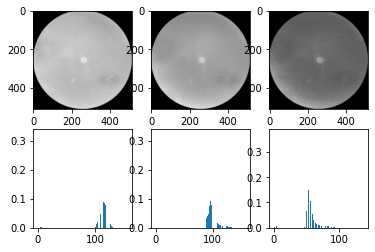

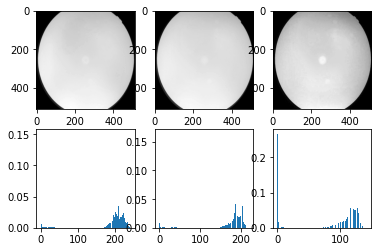

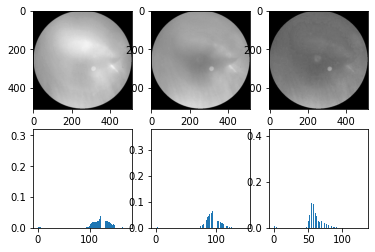

In [91]:
normal = io.imread(f'{base_dir}/preprocessed_images/0_right.jpg')
cataract = io.imread(f'{base_dir}/preprocessed_images/0_left.jpg')
opacity = io.imread(f'{base_dir}/preprocessed_images/156_left.jpg')

normal2 = io.imread(f'{base_dir}/preprocessed_images/173_left.jpg')
cataract2 = io.imread(f'{base_dir}/preprocessed_images/188_right.jpg')
opacity2 = io.imread(f'{base_dir}/preprocessed_images/218_left.jpg')

show_histogram(cataract)
show_histogram(cataract2)
show_histogram(opacity2)


In [90]:
print(calc_similarity_by_histogram(normal, normal2, channels='rgb'))
print(calc_similarity_by_histogram(normal, cataract2, channels='rgb'))
print(calc_similarity_by_histogram(normal, opacity2, channels='rgb'))

print(calc_similarity_by_histogram(cataract, normal2, channels='rgb'))
print(calc_similarity_by_histogram(cataract, cataract2, channels='rgb'))
print(calc_similarity_by_histogram(cataract, opacity2, channels='rgb'))


print(calc_similarity_by_histogram(opacity, normal2, channels='rgb'))
print(calc_similarity_by_histogram(opacity, cataract2, channels='rgb'))
print(calc_similarity_by_histogram(opacity, opacity2, channels='rgb'))

https://github.com/muratkrty/specularity-removal

1.09375
0.8984375
0.6328125
1.41015625
0.82421875
0.24609375
1.1484375
1.26953125
1.64453125
